# Profitable App Profiles for the Apple Store and Google Play Markets

This project will be analyzing data related apps (Mobile App Data) in google and apple store so as to eb able to understand user preferences when downloading apps.

This goal of the project is to be able to help company generate more revenue through a data-driven decision by understanding what type of apps are likely to attarct more users on Google Play and Apple store

## Opening and Exploring Data

Collecting data for over 5 million apps (see Figure below) requires a significant amount of time and money, so we'll try to analyze a sample of the data instead. To avoid spending resources on collecting new data ourselves, we have been able to find two data sets from Kaggle, that seem suitable for our goals:

**[Google Play store](https://www.kaggle.com/lava18/google-play-store-apps)**

   - [Direct Link](https://dq-content.s3.amazonaws.com/350/googleplaystore.csv)


**[Apple Store store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)**

   - [Direct Link](https://dq-content.s3.amazonaws.com/350/AppleStore.csv)




![Figure1](Number_of_Apps_on_Leading_App_stores.jpg)

In [70]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
google = pd.read_csv("googleplaystore.csv")
apple = pd.read_csv("AppleStore.csv")

In [3]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


### Exploring Specific rows of the Dataset

In [5]:
def explore_data(dataset, start, end, rows_columns = False):
    display(dataset.iloc[start:end])
    if rows_columns:
        print("Number of rows: ", dataset.shape[0])
        print("Number of columns: ", dataset.shape[1])

In [6]:
explore_data(apple, 5, 10, rows_columns=True)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,6.26,12+,Social Networking,37,5,27,1
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,1.101.0,4+,Games,43,5,24,1
8,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,8.4.3,12+,Music,37,5,18,1
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,7.4.0,4+,Games,38,0,10,1


Number of rows:  7197
Number of columns:  16


In [7]:
explore_data(google, 20, 30, rows_columns=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14M,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
21,Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654,12M,"100,000+",Free,0,Everyone,Art & Design,"March 20, 2018",1.1,4.0.3 and up
22,Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2M,"500,000+",Free,0,Everyone 10+,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
24,HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23M,"50,000+",Free,0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,"10,000+",Free,0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25M,"500,000+",Free,0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
27,Animated Photo Editor,ART_AND_DESIGN,4.1,203,6.1M,"100,000+",Free,0,Everyone,Art & Design,"March 21, 2018",1.03,4.0.3 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
29,Easy Realistic Drawing Tutorial,ART_AND_DESIGN,4.1,223,4.2M,"100,000+",Free,0,Everyone,Art & Design,"August 22, 2017",1.0,2.3 and up


Number of rows:  10841
Number of columns:  13


**Google app store dataset**
 - Number of rows: 10,841
 - Number of columns: 13
 
 
 **Apple play store dataset**
  - Number of rows: 7,197
  - Number of columns: 16 

In [8]:
google.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
apple.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [10]:
type(google.columns)

pandas.core.indexes.base.Index

In [11]:
for ind in google.columns:
    print(ind)

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


## Data Cleaning

### Deleting Wrong Data

Recall that at our company, we only build apps that are free to download and install, and we design them for an English-speaking audience. This means that we'll need to do the following:
 - Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
 - Remove apps that aren't free.
 
 
In other to do the data cleaning efectiveyl, going through the discussions desctions will be a good start, so as to understand our datasets of any erros which might have been discussed.

The Google Play dataset has a [dedicated discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion), and we can see that 
 - [one of the discussions](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) describes "Wrong Entry for 10472 row".
 - 

Also for the apple store the [dedicated section](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps/discussion?select=appleStore_description.csv)

In [12]:
google.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

It can be obsrved that the category section is missing and the records shifted left creating no record for *Android ver* column. 

Thus this row will be deleted

In [13]:
google.iloc[10471:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [14]:
# google = google.drop(10472)

In [15]:
google = google.drop(10472)

In [16]:
google.iloc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated               August 7, 2018
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

### Removing Duplicate Enteries

From [a specific discussion forum](https://www.kaggle.com/datasets/lava18/google-play-store-apps/discussion/67894?search=duplicate) thread, notice of duplicate entries for several apps was observed - where many of the duplicate entries differ only by review count.

In [17]:
print("Google App Duplicates: ", google.duplicated(subset='App').sum())
print("Apple App Duplicates: ", apple.duplicated(subset='track_name').sum())

Google App Duplicates:  1181
Apple App Duplicates:  2


There are are 1,181 duplicate apps in google app store in this dataset

While 2 are in apple dataset

In [18]:
google[google.duplicated(subset='App')].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
266,Zenefits,BUSINESS,4.2,296,14M,"50,000+",Free,0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up
267,Google Ads,BUSINESS,4.3,29313,20M,"5,000,000+",Free,0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
269,Slack,BUSINESS,4.4,51507,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device


In [19]:
apple[apple.duplicated(subset='track_name')]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


Let's see some example of duplicate apps

In [20]:
google[google['App'] == "Google My Business"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
268,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up


In [21]:
google[google['App'] == "Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [22]:
google[google['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [23]:
apple[apple["track_name"] == "VR Roller Coaster"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


In [24]:
apple[apple["track_name"] == "Mannequin Challenge"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


#### For Google
Examining the rows we printed for the 3 apps shown above, where differences are observed in each record, the main difference happens on the *Reviews* column. The different numbers show the data was collected at different times.

We can use this information to build a criterion for removing the duplicates. The higher the number of reviews, the more recent the data should be. Rather than removing duplicates randomly, we'll only keep the row with the highest number of reviews and remove the other entries for any given app.

#### For Apple
While for apple, the differences are in app version. Thus, we will only keep the latest version of the app

In [25]:
# Firstly, we sort by Reviews with the largest reviews at the top (Descendig order)
# Drop duplicates keeping the largest values, which will be he first
google =  google.sort_values('Reviews', ascending=False)
google_clean = google.drop_duplicates(subset='App', keep='first')

In [26]:
google_clean[google_clean['App'] == 'Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up


In [27]:
google_clean[google_clean['App'] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [28]:
google_clean.shape

(9659, 13)

In [29]:
apple = apple.sort_values('ver', ascending=False)
apple_clean = apple.drop_duplicates(subset="track_name", keep="first")

In [30]:
apple_clean[apple_clean["track_name"] == "VR Roller Coaster"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1


### Removing Non-English Apps

In [31]:
# pd.set_option("display.max_rows", None)

In [32]:
"""
This fucntions is used to separate english and non-english app from the dataset.
Any word which ASCII value is more than 127 and contain more than 3 emoticons 
are referred to as non-english app here
"""
def check_English(word):
    count = 0
    for letter in word:
        if ord(letter) > 127:
            count += 1
    if count > 3:
        return "non-english"
    else:
        return "english"

In [33]:
check_English("Instachat 😜")

'english'

In [102]:
ord("😜")

128540

In [92]:

check_English("教えて!goo")

'english'

In [98]:
count = 0
for letter in "教えて!goo":
    if ord(letter) > 127:
        count += 1
count

3

In [99]:
for letter in "教えて!goo":
    print(letter, ord(letter))

教 25945
え 12360
て 12390
! 33
g 103
o 111
o 111


In [100]:
count = 0
for letter in "教えて!goo":
    if ord(letter) > 127:
        print(ord(letter))


25945
12360
12390


In [34]:
pd.options.mode.chained_assignment = None  # default='warn'
google_clean["app_language"] = google_clean["App"].map(check_English)

In [104]:
google_clean[google_clean["app_language"] != "english"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up,non-english
9777,FAHREDDİN er-RÂZİ TEFSİRİ,BOOKS_AND_REFERENCE,NaN,9,20M,"1,000+",Free,0,Everyone,Books & Reference,"March 19, 2018",1.1,4.0.3 and up,non-english
7290,Offline Jízdní řády CG Transit,MAPS_AND_NAVIGATION,4.6,7314,7.0M,"100,000+",Free,0,Everyone,Maps & Navigation,"September 7, 2017",3.1.4,4.0 and up,non-english
6201,CSCS BG (в български),FAMILY,2.4,7,2.1M,100+,Paid,$3.99,Everyone,Education,"March 23, 2017",1.0,4.0.3 and up,non-english
6418,あなカレ【BL】無料ゲーム,FAMILY,4.7,6073,8.5M,"100,000+",Free,0,Mature 17+,Simulation,"February 25, 2018",4.2.2,2.3 and up,non-english
9248,ECナビ×シュフー,LIFESTYLE,4.0,576,7.4M,"50,000+",Free,0,Everyone,Lifestyle,"June 7, 2018",1.0.2,4.0 and up,non-english
710,Flame - درب عقلك يوميا,EDUCATION,4.6,56065,37M,"1,000,000+",Free,0,Everyone,Education,"July 26, 2018",3.3,4.1 and up,non-english
9222,英漢字典 EC Dictionary,FAMILY,4.3,55408,Varies with device,"1,000,000+",Free,0,Everyone,Education,"January 8, 2018",Varies with device,Varies with device,non-english
8394,DG ग्राम / Digital Gram Panchayat,NEWS_AND_MAGAZINES,4.5,53,5.9M,"10,000+",Free,0,Teen,News & Magazines,"June 19, 2018",1.7,4.0 and up,non-english
4324,"L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰,...",LIFESTYLE,4.0,45224,49M,"5,000,000+",Free,0,Everyone,Lifestyle,"August 1, 2018",6.5.1,4.1 and up,non-english


In [106]:
for app in google_clean[google_clean["app_language"] != "english"]["App"].unique():
    print(app)

FP Разбитый дисплей
FAHREDDİN er-RÂZİ TEFSİRİ
Offline Jízdní řády CG Transit
CSCS BG (в български)
あなカレ【BL】無料ゲーム
ECナビ×シュフー
Flame - درب عقلك يوميا
英漢字典 EC Dictionary
DG ग्राम / Digital Gram Panchayat
L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰, 롯데]
РИА Новости
뽕티비 - 개인방송, 인터넷방송, BJ방송
RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템
BL 女性向け恋愛ゲーム◆俺プリクロス
EG SIM CARD (EGSIMCARD, 이지심카드)
أحداث وحقائق | خبر عاجل في اخبار العالم
Ay Yıldız Duvar Kağıtları
CK 初一 十五
哈哈姆特不EY
لعبة تقدر تربح DZ
Bonjour 2017 Abidjan CI ❤❤❤❤❤
သိင်္ Astrology - Min Thein Kha BayDin
BS Calendar / Patro / पात्रो
日本AV历史
中国語 AQリスニング
Билеты ПДД CD 2019 PRO
Vip视频免费看-BT磁力搜索
DM הפקות
AÖF Ev İdaresi 1. Sınıf
বাংলা টিভি প্রো BD Bangla TV
BQ-መጽሐፍ ቅዱሳዊ ጥያቄዎች
BL 女性向け恋愛ゲーム◆ごくメン
감성학원 BL 첫사랑
Al Quran Free - القرآن (Islam)
RPG ブレイジング ソウルズ アクセレイト
SecondSecret ‐「恋を読む」BLノベルゲーム‐
Ey Sey Storytime រឿងនិទានតាឥសី
صور حرف H
Cъновник BG
বাংলাflix
DW فارسی By dw-arab.com
الفاتحون Conquerors
パーリーゲイツ公式通販｜EJ STYLE（イージェイスタイル）
AJ렌터카 법인 카셰어링
I'm Rich/Eu sou Rico/أنا

In [36]:
# Dropping the apps that are not englsh
google_clean_english = google_clean[google_clean["app_language"] == "english"]

In [37]:
google_clean_english.shape

(9614, 14)

In [38]:
google_clean.shape

(9659, 14)

In [107]:
google_clean_english[google_clean_english["App"] == "Égalité et Réconciliation"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
9828,Égalité et Réconciliation,NEWS_AND_MAGAZINES,4.9,58,3.8M,500+,Paid,$2.99,Everyone,News & Magazines,"May 26, 2018",1.1.1,5.0 and up,english


In [39]:
# Repeating the same thing for apple apps

apple_clean["app_language"] = apple_clean["track_name"].map(check_English)
apple_clean_english = apple_clean[apple_clean["app_language"] == "english"]
print(apple_clean.shape)
print(apple_clean_english.shape)

(7195, 17)
(6181, 17)


In [40]:
apple_clean[apple_clean["app_language"] != "english"]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
5306,931337752,幻獣契約クリプトラクト,97223680,USD,0.0,33,0,4.0,0.0,v3.6.9,9+,Games,40,5,1,1,non-english
5455,983202217,乐视体育—英超欧冠F1高清直播,121336832,USD,0.0,24,0,3.5,0.0,V3.7.0,17+,Sports,38,0,4,1,non-english
2592,452186370,百度地图-智能的手机导航，公交地铁出行必备,213586944,USD,0.0,1014,23,4.0,4.5,9.8.2,17+,Navigation,37,0,2,1,non-english
5083,564713751,51信用卡管家,68952064,USD,0.0,47,0,4.0,0.0,9.4.1,4+,Finance,38,4,2,1,non-english
3065,452176796,蘑菇街-网红直播搭配的购物特卖平台,144661504,USD,0.0,558,0,5.0,0.0,9.4.1,17+,Shopping,37,0,4,1,non-english
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6270,977041956,最長１週間の献立が簡単に作れるme:new（ミーニュー）,39937024,USD,0.0,0,0,0.0,0.0,"1,2.4",4+,Food & Drink,38,4,2,1,non-english
5706,794156760,ゆるドラシル -本格派神話RPG-,91238400,USD,0.0,14,0,4.5,0.0,01.44.02,4+,Games,37,5,1,1,non-english
6834,1074321709,バーチャル恵方巻【節分・恵方コンパス・方位】,5177344,USD,0.0,0,0,0.0,0.0,00.00.09,4+,Navigation,40,5,1,1,non-english
5638,1144397186,エレメンタル ファンタジー - 高精細３ＤアクションＲＰＧ,173584384,USD,0.0,17,0,5.0,0.0,0.17.518,12+,Games,38,5,1,1,non-english


###  Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our datasets contain both free and non-free apps; we'll need to isolate only the free apps for our analysis.

This will be done by identifying the price column retaining only that have zero as the price

In [41]:
google_clean_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9614 entries, 2989 to 7101
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9614 non-null   object 
 1   Category        9614 non-null   object 
 2   Rating          8166 non-null   float64
 3   Reviews         9614 non-null   object 
 4   Size            9614 non-null   object 
 5   Installs        9614 non-null   object 
 6   Type            9613 non-null   object 
 7   Price           9614 non-null   object 
 8   Content Rating  9614 non-null   object 
 9   Genres          9614 non-null   object 
 10  Last Updated    9614 non-null   object 
 11  Current Ver     9606 non-null   object 
 12  Android Ver     9612 non-null   object 
 13  app_language    9614 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.1+ MB


In [42]:
google_clean_2 = google_clean_english[google_clean_english["Price"] == "0"]
# google_clean_2 = google_clean_english[google_clean_english["Type"] == "Free"]

In [43]:
google_clean_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,english
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,english


In [44]:
google_clean_2.shape

(8862, 14)

In [45]:
google_clean[(google_clean['Type'] != "Free") & (google_clean['Price'] == '0')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,english


In [46]:
apple_clean_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6181 entries, 1169 to 4610
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6181 non-null   int64  
 1   track_name        6181 non-null   object 
 2   size_bytes        6181 non-null   int64  
 3   currency          6181 non-null   object 
 4   price             6181 non-null   float64
 5   rating_count_tot  6181 non-null   int64  
 6   rating_count_ver  6181 non-null   int64  
 7   user_rating       6181 non-null   float64
 8   user_rating_ver   6181 non-null   float64
 9   ver               6181 non-null   object 
 10  cont_rating       6181 non-null   object 
 11  prime_genre       6181 non-null   object 
 12  sup_devices.num   6181 non-null   int64  
 13  ipadSc_urls.num   6181 non-null   int64  
 14  lang.num          6181 non-null   int64  
 15  vpp_lic           6181 non-null   int64  
 16  app_language      6181 non-null   objec

In [47]:
apple_clean_2 = apple_clean_english[apple_clean_english["price"] == 0]

In [48]:
apple_clean_2.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
1169,945621521,Quick Hit Slots – Casino Slot Machines Games,186679296,USD,0.0,7646,46,4.0,4.0,v2.2.21,17+,Games,38,5,1,1,english
224,491730359,The CW,30552064,USD,0.0,97368,9,4.5,3.5,v2.13.9,12+,Entertainment,37,5,9,1,english
4031,1023683909,Alliance Wars: World Domination,493512704,USD,0.0,176,6,5.0,5.0,v1.865,12+,Games,38,1,1,1,english
2984,1028464453,Strawberry Shortcake Candy Garden,232399872,USD,0.0,633,633,4.5,4.5,Update 1.1,4+,Entertainment,39,5,10,1,english
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,english


In [49]:
apple_clean_2.shape

(3220, 17)

## Most Common Apps by Genre

If you could recall, our goal is to determine the kinds of apps that are likely to attract more users because the number of people using our apps affect our revenue. 

Thus, in other to do this, we identify the most common genres for both google play store and IOS store. For this, we'll need to build frequency tables for a few columns in our datasets.

### Google Store

In [50]:
google_clean_2["Category"].value_counts(normalize=True)*100

FAMILY                 18.946062
GAME                    9.693072
TOOLS                   8.451817
BUSINESS                4.592643
LIFESTYLE               3.904311
PRODUCTIVITY            3.893026
FINANCE                 3.701196
MEDICAL                 3.520650
SPORTS                  3.396524
PERSONALIZATION         3.317536
COMMUNICATION           3.238547
HEALTH_AND_FITNESS      3.080569
PHOTOGRAPHY             2.945159
NEWS_AND_MAGAZINES      2.798465
SOCIAL                  2.663056
TRAVEL_AND_LOCAL        2.335816
SHOPPING                2.245543
BOOKS_AND_REFERENCE     2.143986
DATING                  1.861882
VIDEO_PLAYERS           1.794177
MAPS_AND_NAVIGATION     1.399233
FOOD_AND_DRINK          1.241255
EDUCATION               1.173550
ENTERTAINMENT           0.947867
LIBRARIES_AND_DEMO      0.936583
AUTO_AND_VEHICLES       0.925299
HOUSE_AND_HOME          0.823742
WEATHER                 0.801174
EVENTS                  0.710900
PARENTING               0.654480
ART_AND_DE

In [51]:
google_clean_2["Genres"].value_counts(normalize=True)*100

Tools                                  8.440533
Entertainment                          6.070864
Education                              5.348680
Business                               4.592643
Productivity                           3.893026
                                         ...   
Trivia;Education                       0.011284
Puzzle;Education                       0.011284
Strategy;Action & Adventure            0.011284
Health & Fitness;Education             0.011284
Health & Fitness;Action & Adventure    0.011284
Name: Genres, Length: 115, dtype: float64

### Apple Store

In [52]:
apple_clean_2["prime_genre"].value_counts(normalize=True)*100

Games                58.136646
Entertainment         7.888199
Photo & Video         4.968944
Education             3.664596
Social Networking     3.291925
Shopping              2.608696
Utilities             2.515528
Sports                2.142857
Music                 2.049689
Health & Fitness      2.018634
Productivity          1.739130
Lifestyle             1.583851
News                  1.335404
Travel                1.242236
Finance               1.118012
Weather               0.869565
Food & Drink          0.807453
Reference             0.559006
Business              0.527950
Book                  0.434783
Navigation            0.186335
Medical               0.186335
Catalogs              0.124224
Name: prime_genre, dtype: float64

## Most Popular apps Genre on the App store

Here we want to determine the kind of apps with the most users. One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

In [53]:
apple_group = apple_clean_2.groupby("prime_genre")

In [54]:
apple_group.groups.keys()

dict_keys(['Book', 'Business', 'Catalogs', 'Education', 'Entertainment', 'Finance', 'Food & Drink', 'Games', 'Health & Fitness', 'Lifestyle', 'Medical', 'Music', 'Navigation', 'News', 'Photo & Video', 'Productivity', 'Reference', 'Shopping', 'Social Networking', 'Sports', 'Travel', 'Utilities', 'Weather'])

In [55]:
apple_group.get_group("Book")

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
77,302584613,"Kindle – Read eBooks, Magazines & Textbooks",169747456,USD,0.0,252076,80,3.5,4.5,5.11,4+,Book,37,5,9,1,english
5875,1064016503,MangaZERO - comic reader,99365888,USD,0.0,9,3,4.5,3.5,4.0.2,17+,Book,37,4,2,1,english
285,366869252,OverDrive – Library eBooks and Audiobooks,39844864,USD,0.0,65450,2721,4.0,4.5,3.6.4,4+,Book,37,5,18,1,english
6796,1064016216,MangaTiara - love comic reader,81198080,USD,0.0,0,0,0.0,0.0,3.4.2,17+,Book,37,0,1,1,english
6647,855062660,ikouhoushi,58945536,USD,0.0,0,0,0.0,0.0,3.1.83,17+,Book,37,1,3,1,english
364,1024818709,HOOKED - Chat Stories,94545920,USD,0.0,47829,708,4.5,4.5,2.28.0,9+,Book,37,0,8,1,english
208,379693831,"Audible – audio books, original series & podcasts",81558528,USD,0.0,105274,1774,4.5,4.5,2.23,4+,Book,37,5,5,1,english
244,1031002863,Color Therapy Adult Coloring Book for Adults,135236608,USD,0.0,84062,1450,5.0,4.5,2.0,4+,Book,37,4,2,1,english
2704,482728980,BookShout: Read eBooks & Track Your Reading Goals,106071040,USD,0.0,879,22,4.0,3.5,10.1,12+,Book,37,5,1,1,english
3232,909110675,Dr. Seuss Treasury — 50 best kids books,100943872,USD,0.0,451,31,4.5,4.5,1.8.3,4+,Book,37,4,1,1,english


In [56]:
apple_group.get_group("Book")["rating_count_tot"].sum()

556619

In [57]:
apple_group.get_group("Book")["rating_count_tot"].count()

14

In [58]:
apple_group.get_group("Book")["rating_count_tot"].shape[0]

14

In [59]:
# apple_popular = {genre: apple_group.get_group(genre)["rating_count_tot"].sum()/apple_group.get_group("Book")["rating_count_tot"].count()
#                  for genre in apple_group.groups.keys()}

In [60]:
apple_popular = {}
for genre in apple_group.groups.keys():
    total_user_rating = apple_group.get_group(genre)["rating_count_tot"].sum()
    num_user_rating = apple_group.get_group(genre)["rating_count_tot"].count()
    apple_popular[genre] = round(total_user_rating/num_user_rating, 2)

In [61]:
apple_popular.items()

dict_items([('Book', 39758.5), ('Business', 7491.12), ('Catalogs', 4004.0), ('Education', 7003.98), ('Entertainment', 14029.83), ('Finance', 31467.94), ('Food & Drink', 33333.92), ('Games', 22812.92), ('Health & Fitness', 23298.02), ('Lifestyle', 16485.76), ('Medical', 612.0), ('Music', 57326.53), ('Navigation', 86090.33), ('News', 21248.02), ('Photo & Video', 28441.54), ('Productivity', 21028.41), ('Reference', 74942.11), ('Shopping', 26919.69), ('Social Networking', 71548.35), ('Sports', 23008.9), ('Travel', 28243.8), ('Utilities', 18684.46), ('Weather', 52279.89)])

In [62]:
apple_popular = dict(sorted(apple_popular.items(), key=lambda x: x[1], reverse=True))
apple_popular

{'Navigation': 86090.33,
 'Reference': 74942.11,
 'Social Networking': 71548.35,
 'Music': 57326.53,
 'Weather': 52279.89,
 'Book': 39758.5,
 'Food & Drink': 33333.92,
 'Finance': 31467.94,
 'Photo & Video': 28441.54,
 'Travel': 28243.8,
 'Shopping': 26919.69,
 'Health & Fitness': 23298.02,
 'Sports': 23008.9,
 'Games': 22812.92,
 'News': 21248.02,
 'Productivity': 21028.41,
 'Utilities': 18684.46,
 'Lifestyle': 16485.76,
 'Entertainment': 14029.83,
 'Business': 7491.12,
 'Education': 7003.98,
 'Catalogs': 4004.0,
 'Medical': 612.0}

Navigation, Reference, Social Netorking, Music and Weather apps have user rating  above 50,000, with Navigation apps being the highest.

Let's further investigate these 5 genre of apps

In [63]:
navigation = apple_group.get_group("Navigation")

In [65]:
navigation

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
3987,344176018,ImmobilienScout24: Real Estate Search in Germany,126867456,USD,0.0,187,0,3.5,0.0,9.5,4+,Navigation,37,5,3,1,english
881,329541503,Geocaching®,108166144,USD,0.0,12811,134,3.5,1.5,5.3,4+,Navigation,37,0,22,1,english
130,585027354,Google Maps - Navigation & Transit,120232960,USD,0.0,154911,1253,4.5,4.0,4.31.1,12+,Navigation,37,5,34,1,english
49,323229106,"Waze - GPS Navigation, Maps & Real-time Traffic",94139392,USD,0.0,345046,3040,4.5,4.5,4.24,4+,Navigation,37,5,36,1,english
6033,463431091,Railway Route Search,46950400,USD,0.0,5,0,3.0,0.0,3.17.1,4+,Navigation,37,0,1,1,english
1633,504677517,CoPilot GPS – Car Navigation & Offline Maps,82534400,USD,0.0,3582,70,4.0,3.5,10.0.0.984,4+,Navigation,38,5,25,1,english


User rating is skewed towards 

- Right
    - Waze (345,046) and Googlemaps (154,911)

- Left
    - Railway route search (5)

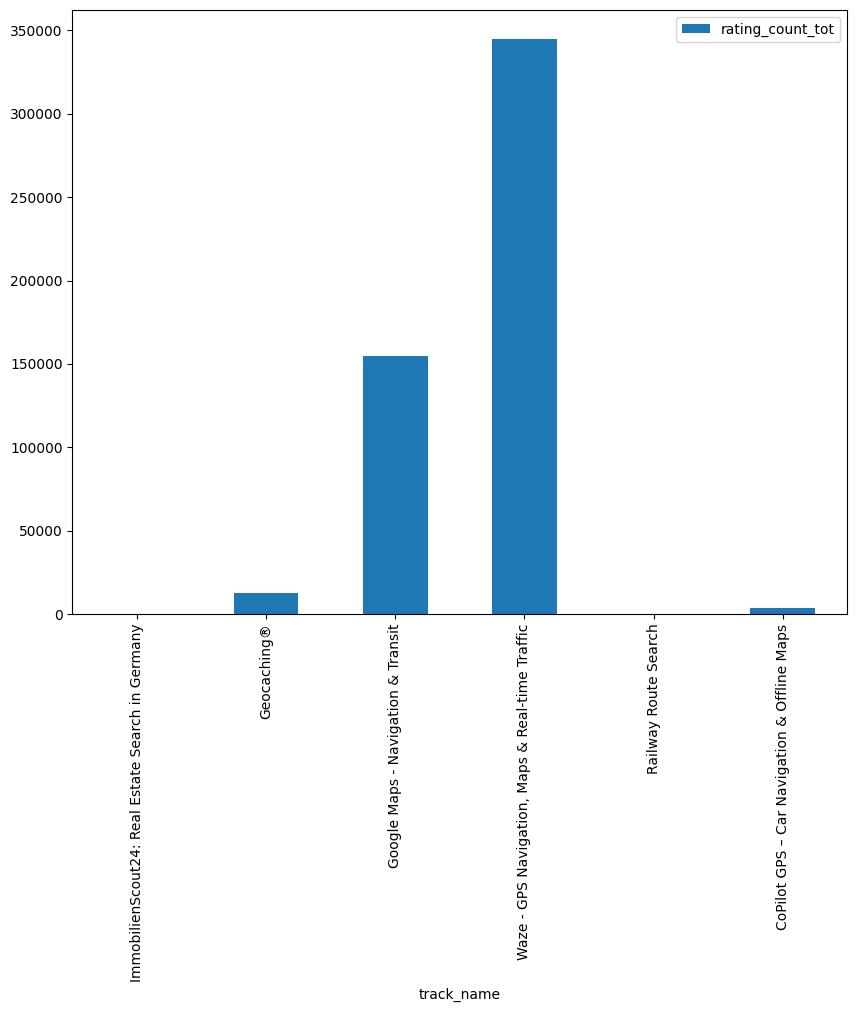

In [89]:
apple_group.get_group("Navigation").plot.bar(x = "track_name", y = "rating_count_tot", figsize=(10, 8))
plt.show()

In [67]:
apple_group.get_group("Reference")

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_language
715,388389451,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",100551680,USD,0.0,18418,706,4.5,5.0,9.2.1,4+,Reference,37,5,16,1,english
5932,1156856246,Real Bike Traffic Rider Virtual Reality Glasses,125990912,USD,0.0,8,2,3.0,4.5,8.9,17+,Reference,40,5,1,1,english
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,english
90,308750436,Dictionary.com Dictionary & Thesaurus,111275008,USD,0.0,200047,177,4.0,4.0,7.1.3,4+,Reference,37,0,1,1,english
2844,640199958,WWDC,34959360,USD,0.0,762,7,3.5,4.5,6.0.0,4+,Reference,37,5,1,1,english
551,414706506,Google Translate,65281024,USD,0.0,26786,27,3.5,4.5,5.10.0,4+,Reference,37,5,59,1,english
913,475772902,Night Sky,596499456,USD,0.0,12122,60,4.5,4.5,4.4.1,4+,Reference,37,5,29,1,english
757,399452287,Merriam-Webster Dictionary,155593728,USD,0.0,16849,1125,4.5,4.5,4.1,4+,Reference,38,1,12,1,english
335,364740856,Dictionary.com Dictionary & Thesaurus for iPad,165748736,USD,0.0,54175,10176,4.5,4.5,4.0,4+,Reference,24,5,9,1,english
6379,980134624,教えて!goo,44208128,USD,0.0,0,0,0.0,0.0,2.2.3,12+,Reference,37,0,1,1,english


/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 25945 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12360 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12390 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 25945 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 12360 missing from current font.

/dataquest/system/env/python3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 12390 missing from current font.



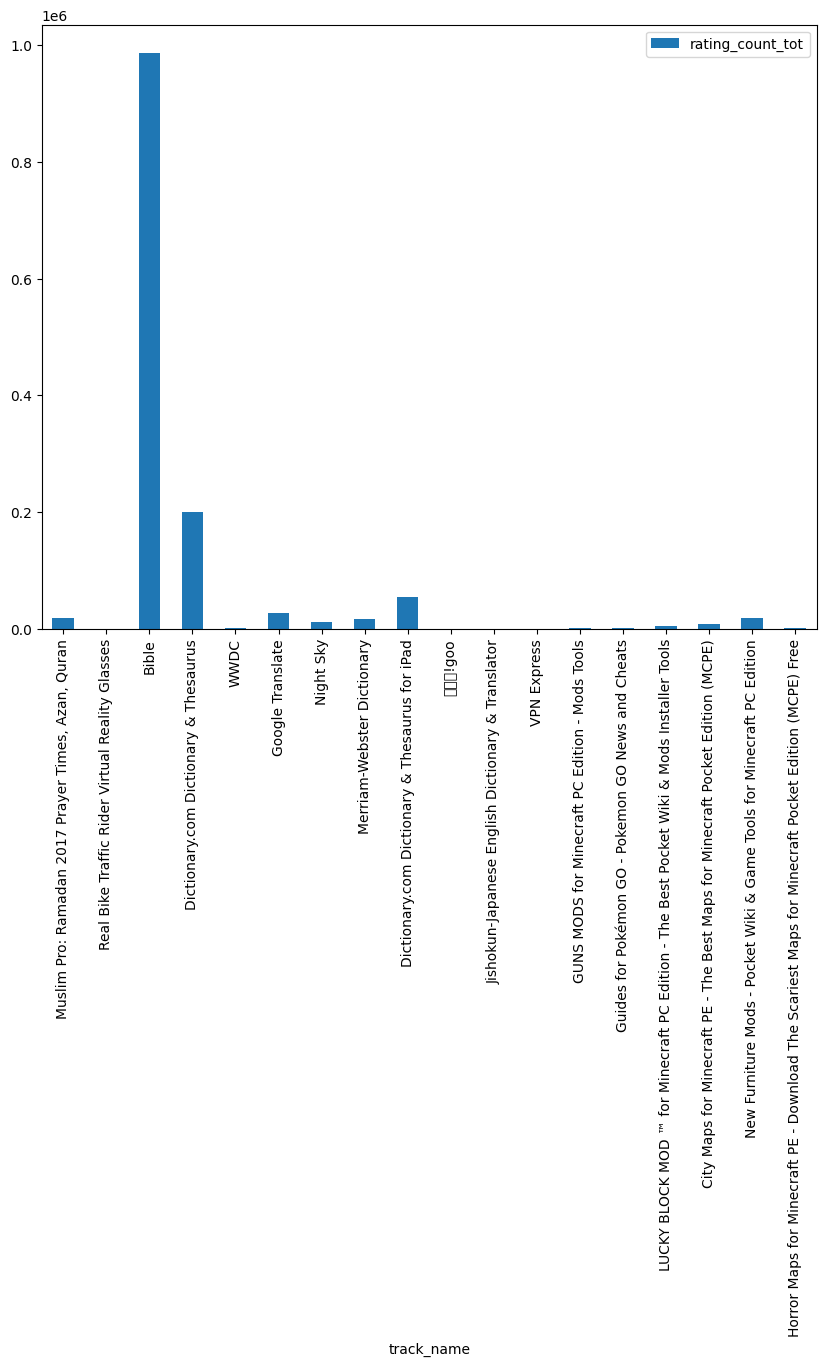

In [90]:
apple_group.get_group("Reference").plot.bar(x = "track_name", y = "rating_count_tot", figsize=(10, 8))
plt.show()

## Most Popular Apps by Genre on Google Play

In [73]:
google_clean_2.sort_values(by="Installs", ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8862 entries, 2989 to 7101
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8862 non-null   object 
 1   Category        8862 non-null   object 
 2   Rating          7564 non-null   float64
 3   Reviews         8862 non-null   object 
 4   Size            8862 non-null   object 
 5   Installs        8862 non-null   object 
 6   Type            8861 non-null   object 
 7   Price           8862 non-null   object 
 8   Content Rating  8862 non-null   object 
 9   Genres          8862 non-null   object 
 10  Last Updated    8862 non-null   object 
 11  Current Ver     8856 non-null   object 
 12  Android Ver     8861 non-null   object 
 13  app_language    8862 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [69]:
# Firstly, converting the "Installs" column to a float
google_clean_2["Installs"] = google_clean_2["Installs"].str.replace("+", "")
google_clean_2["Installs"] = google_clean_2["Installs"].str.replace(",", "")
google_clean_2["Installs"] = google_clean_2["Installs"].astype(float)
google_clean_2["Category"] = google_clean_2["Category"].str.lower()
google_clean_2["Genres"] = google_clean_2["Genres"].str.lower()

In [70]:
google_clean_2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,sports,4.2,9992,31M,1000000.0,Free,0,Everyone,sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,tools,3.3,999,91k,100000.0,Free,0,Everyone,tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,shopping,4.2,9975,18M,1000000.0,Free,0,Everyone,shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,sports,4.0,9971,33M,1000000.0,Free,0,Everyone,sports,"June 5, 2018",7.1,5.0 and up,english
3229,DreamTrips,travel_and_local,4.7,9971,22M,500000.0,Free,0,Teen,travel & local,"August 6, 2018",1.28.1,5.0 and up,english


In [76]:
google_group = google_clean_2[google_clean_2["Category"] == google_clean_2["Genres"]]

In [77]:
google_clean_2.shape

(8862, 14)

In [78]:
google_group.shape

(4685, 14)

In [79]:
google_group.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,app_language
2989,GollerCepte Live Score,sports,4.2,9992,31M,1000000.0,Free,0,Everyone,sports,"May 23, 2018",6.5,4.1 and up,english
4970,Ad Block REMOVER - NEED ROOT,tools,3.3,999,91k,100000.0,Free,0,Everyone,tools,"December 17, 2013",3.2,2.2 and up,english
2723,SnipSnap Coupon App,shopping,4.2,9975,18M,1000000.0,Free,0,Everyone,shopping,"January 22, 2018",1.4,4.3 and up,english
3079,US Open Tennis Championships 2018,sports,4.0,9971,33M,1000000.0,Free,0,Everyone,sports,"June 5, 2018",7.1,5.0 and up,english
7982,"Easy Resume Builder, Resume help, Curriculum v...",tools,4.3,996,10M,50000.0,Free,0,Everyone,tools,"September 28, 2017",2.3,4.0.3 and up,english


In [80]:
google_category = google_group.groupby("Category")

In [86]:
google_category.groups.keys()

dict_keys(['beauty', 'business', 'comics', 'communication', 'dating', 'education', 'entertainment', 'events', 'finance', 'lifestyle', 'medical', 'parenting', 'personalization', 'photography', 'productivity', 'shopping', 'social', 'sports', 'tools', 'weather'])

In [89]:
category_app = {}

for category in google_category.groups.keys():
    total = google_category.get_group(category)["Installs"].sum()
    len_category = google_category.get_group(category)["Installs"].count()
    category_app[category] = round(total/len_category, 2)
category_app

{'beauty': 513151.89,
 'business': 1712290.15,
 'comics': 831873.15,
 'communication': 38456119.17,
 'dating': 854028.83,
 'education': 1663978.49,
 'entertainment': 12415949.37,
 'events': 253542.22,
 'finance': 1387692.48,
 'lifestyle': 1412998.34,
 'medical': 120616.49,
 'parenting': 467977.5,
 'personalization': 5201482.61,
 'photography': 17805627.64,
 'productivity': 16787331.34,
 'shopping': 7036877.31,
 'social': 23253652.13,
 'sports': 3638640.14,
 'tools': 10683213.2,
 'weather': 5074486.2}

In [92]:
category_app = dict(sorted(category_app.items(), key=lambda x: x[1], reverse=True))

In [93]:
category_app

{'communication': 38456119.17,
 'social': 23253652.13,
 'photography': 17805627.64,
 'productivity': 16787331.34,
 'entertainment': 12415949.37,
 'tools': 10683213.2,
 'shopping': 7036877.31,
 'personalization': 5201482.61,
 'weather': 5074486.2,
 'sports': 3638640.14,
 'business': 1712290.15,
 'education': 1663978.49,
 'lifestyle': 1412998.34,
 'finance': 1387692.48,
 'dating': 854028.83,
 'comics': 831873.15,
 'beauty': 513151.89,
 'parenting': 467977.5,
 'events': 253542.22,
 'medical': 120616.49}

In [94]:
apple_popular

{'Navigation': 86090.33,
 'Reference': 74942.11,
 'Social Networking': 71548.35,
 'Music': 57326.53,
 'Weather': 52279.89,
 'Book': 39758.5,
 'Food & Drink': 33333.92,
 'Finance': 31467.94,
 'Photo & Video': 28441.54,
 'Travel': 28243.8,
 'Shopping': 26919.69,
 'Health & Fitness': 23298.02,
 'Sports': 23008.9,
 'Games': 22812.92,
 'News': 21248.02,
 'Productivity': 21028.41,
 'Utilities': 18684.46,
 'Lifestyle': 16485.76,
 'Entertainment': 14029.83,
 'Business': 7491.12,
 'Education': 7003.98,
 'Catalogs': 4004.0,
 'Medical': 612.0}